# Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sales_INV.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      3203 non-null   object 
 1   Order Date    3203 non-null   object 
 2   Ship Date     3203 non-null   object 
 3   EmailID       3203 non-null   object 
 4   Geography     3203 non-null   object 
 5   Category      3203 non-null   object 
 6   Product Name  3203 non-null   object 
 7   Sales         3203 non-null   float64
 8   Quantity      3203 non-null   float64
 9   Profit        3203 non-null   float64
dtypes: float64(3), object(7)
memory usage: 250.4+ KB


In [4]:
from sklearn.preprocessing import LabelEncoder

# Assuming df1 is your dataframe

# Creating LabelEncoder object
label_encoder = LabelEncoder()

# Encoding the 'Category' column
df['Category_encoded'] = label_encoder.fit_transform(df['Category'])

# Creating a dictionary to map original labels to encoded values for 'Category'
category_label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Sorting the dictionary by keys
sorted_category_label_mapping = dict(sorted(category_label_mapping.items(), key=lambda item: item[1]))

# Printing the mapping for 'Category'
print("Encoded Category Variables:")
for label, encoded_value in sorted_category_label_mapping.items():
    print(f"{label}: {encoded_value}")

# Encoding the 'Geography' column
df['Geography_encoded'] = label_encoder.fit_transform(df['Geography'])

# Creating a dictionary to map original labels to encoded values for 'Geography'
geography_label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Sorting the dictionary by keys
sorted_geography_label_mapping = dict(sorted(geography_label_mapping.items(), key=lambda item: item[1]))

# Printing the mapping for 'Geography'
print("\nEncoded Geography Variables:")
for label, encoded_value in sorted_geography_label_mapping.items():
    print(f"{label}: {encoded_value}")


Encoded Category Variables:
Accessories: 0
Appliances: 1
Art: 2
Binders: 3
Bookcases: 4
Chairs: 5
Copiers: 6
Envelopes: 7
Fasteners: 8
Furnishings: 9
Labels: 10
Machines: 11
Paper: 12
Phones: 13
Storage: 14
Supplies: 15
Tables: 16

Encoded Geography Variables:
United States,Albuquerque,New Mexico: 0
United States,Anaheim,California: 1
United States,Antioch,California: 2
United States,Apple Valley,California: 3
United States,Arvada,Colorado: 4
United States,Auburn,Washington: 5
United States,Aurora,Colorado: 6
United States,Avondale,Arizona: 7
United States,Bakersfield,California: 8
United States,Bellevue,Washington: 9
United States,Bellingham,Washington: 10
United States,Billings,Montana: 11
United States,Boise,Idaho: 12
United States,Bozeman,Montana: 13
United States,Brentwood,California: 14
United States,Broomfield,Colorado: 15
United States,Bullhead City,Arizona: 16
United States,Burbank,California: 17
United States,Caldwell,Idaho: 18
United States,Camarillo,California: 19
United St

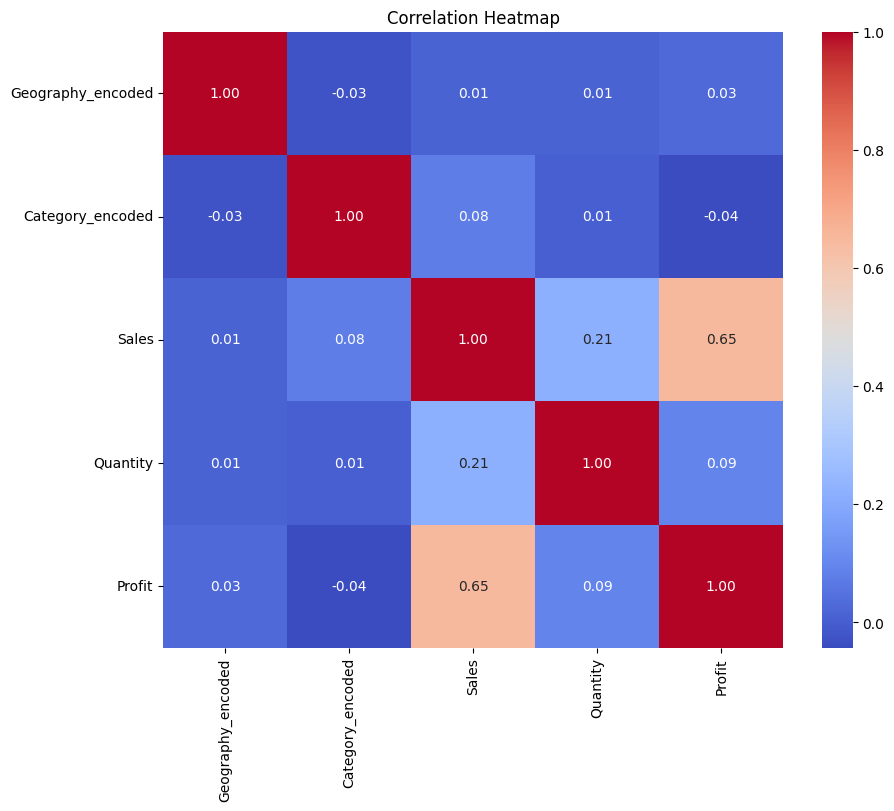

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical columns
numerical_columns = ['Geography_encoded', 'Category_encoded', 'Sales', 'Quantity', 'Profit']

# Creating correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Creating heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

# Save the figure with high quality and ensure it's not cropped
# plt.savefig('correlation_heatmap1.png', dpi=300, bbox_inches='tight')  # Save with high quality by setting dpi=300

# Show the figure
plt.show()


<ipython-input-6-9139e3df149d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


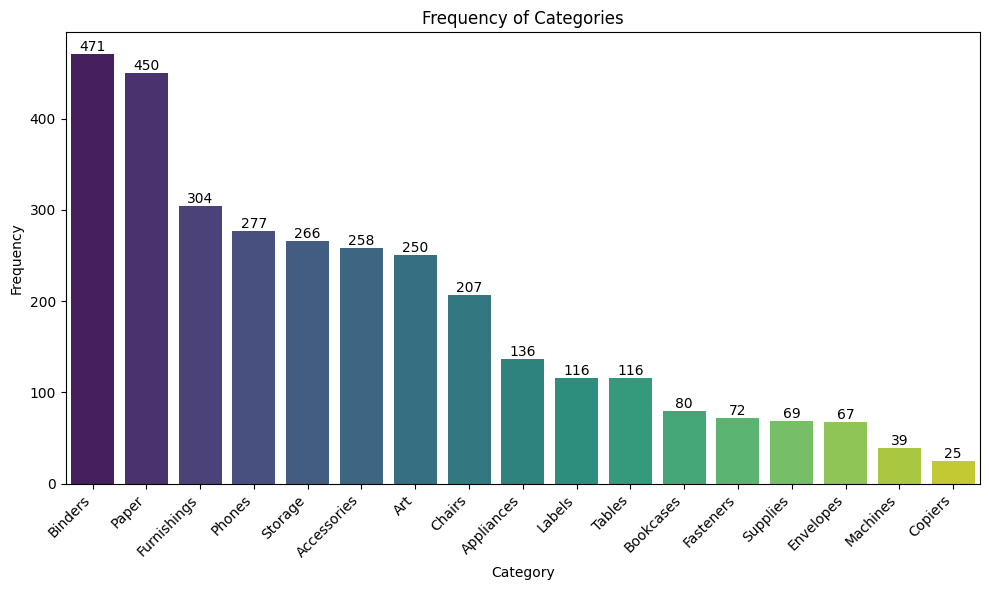

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Counting occurrences of each category
category_counts = df['Category'].value_counts()

# Creating bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Frequency of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adding values on top of bars
for i, count in enumerate(category_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Save the figure with high quality
# plt.savefig('category_frequency.png', dpi=300, bbox_inches='tight')  # Save with high quality by setting dpi=300

# Show the plot
plt.show()


In [7]:
df

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit,Category_encoded,Geography_encoded
0,CA-2013-138688,13-06-13,17-06-13,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,10,80
1,CA-2011-115812,09-06-11,14-06-11,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,9,80
2,CA-2011-115812,09-06-11,14-06-11,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.28,4.0,1.97,2,80
3,CA-2011-115812,09-06-11,14-06-11,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,13,80
4,CA-2011-115812,09-06-11,14-06-11,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,3,80
...,...,...,...,...,...,...,...,...,...,...,...,...
3198,CA-2013-125794,30-09-13,04-10-13,MarisLaWare@gmail.com,"United States,Los Angeles,California",Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.24,1.0,15.22,0,80
3199,CA-2014-121258,27-02-14,04-03-14,DaveBrooks@gmail.com,"United States,Costa Mesa,California",Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2.0,15.63,9,31
3200,CA-2014-121258,27-02-14,04-03-14,DaveBrooks@gmail.com,"United States,Costa Mesa,California",Phones,Aastra 57i VoIP phone,258.58,2.0,19.39,13,31
3201,CA-2014-121258,27-02-14,04-03-14,DaveBrooks@gmail.com,"United States,Costa Mesa,California",Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4.0,13.32,12,31


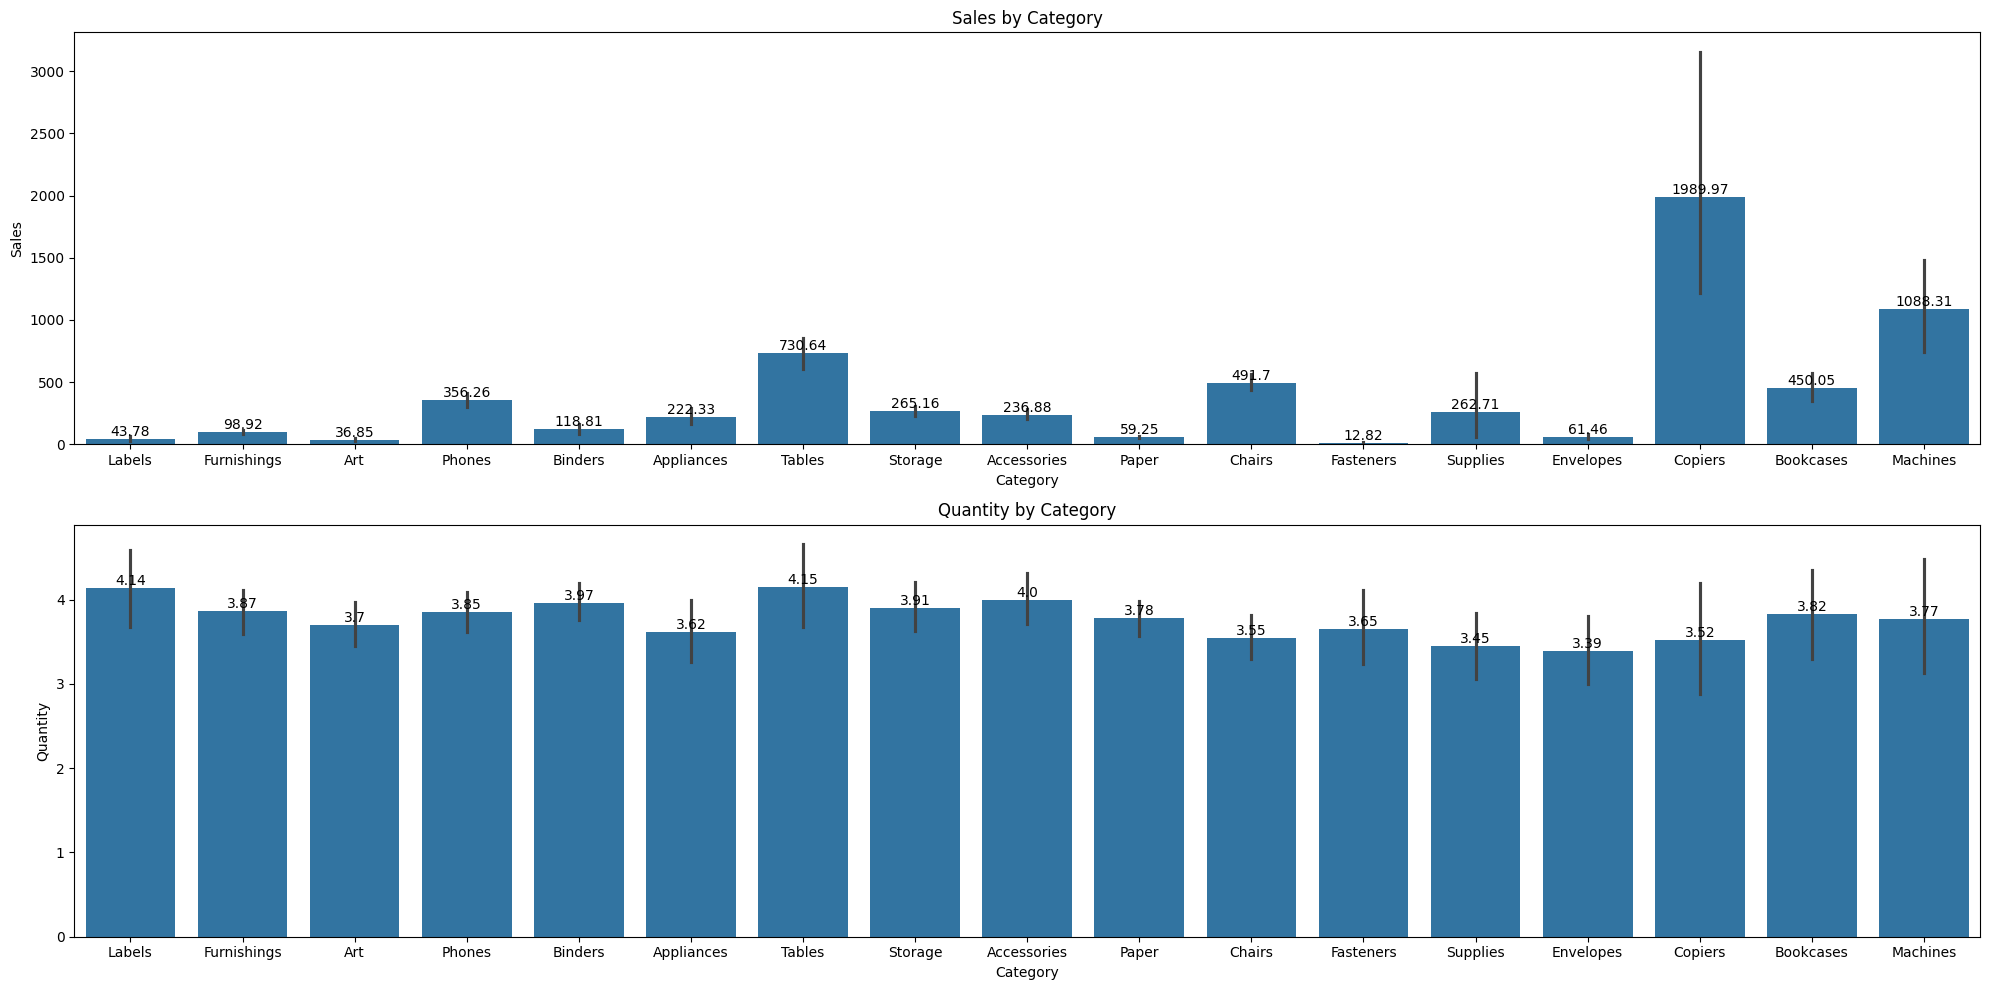

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting columns for visualization
columns_to_visualize = ['Category', 'Sales', 'Quantity']

# Creating subplots
fig, axes = plt.subplots(nrows=len(columns_to_visualize)-1, ncols=1, figsize=(20, 10))

for i, column in enumerate(columns_to_visualize[1:]):
    # Creating bar plot without lines on top of bars
    sns.barplot(x='Category', y=column, data=df, ax=axes[i], linewidth = 10)
    axes[i].set_title(f'{column} by Category')
    axes[i].set_xlabel('Category')
    axes[i].set_ylabel(column)

    # Adding annotations
    for bar in axes[i].patches:
        axes[i].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), ha='center', va='bottom')

plt.tight_layout()

# Save the figure with high quality
# plt.savefig('category_sales_quantity.png', dpi=300, bbox_inches='tight')  # Save with high quality by setting dpi=300

# Show the plot
plt.show()


<ipython-input-9-16d23c512f94>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_profit.index, y=category_profit.values, palette=colors)


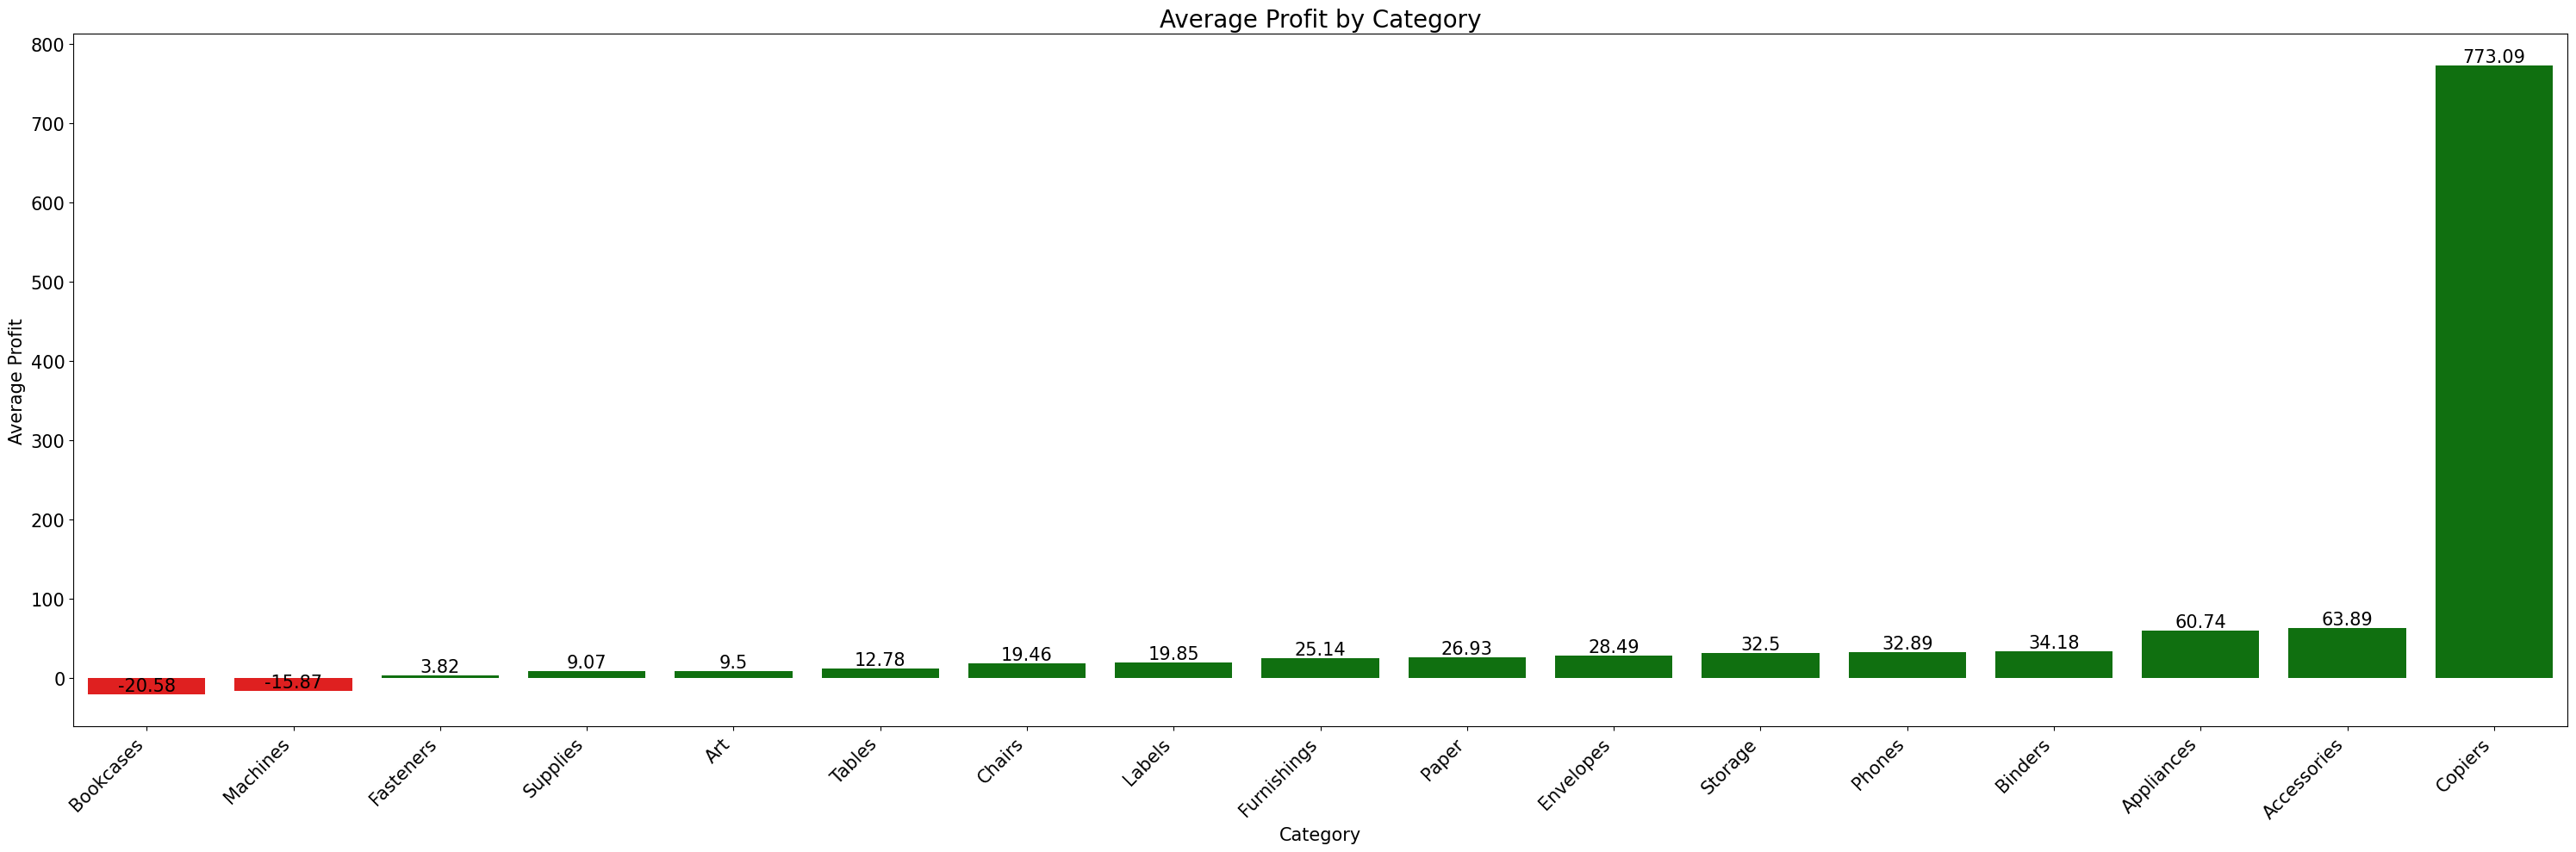

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average profit for each category
category_profit = df.groupby('Category')['Profit'].mean().sort_values()

# Determine color based on positive or negative profit
colors = ['red' if profit < 0 else 'green' for profit in category_profit]

# Create bar plot
plt.figure(figsize=(30, 10))
sns.barplot(x=category_profit.index, y=category_profit.values, palette=colors)
plt.title('Average Profit by Category', fontsize=20)  # Set title font size
plt.xlabel('Category', fontsize=15)  # Set x-axis label font size
plt.ylabel('Average Profit', fontsize=15)  # Set y-axis label font size
plt.xticks(rotation=45, ha='right', fontsize=15)  # Set x-axis tick label font size
plt.yticks(fontsize=15)  # Set y-axis tick label font size
plt.tight_layout()

# Add value labels
for i, count in enumerate(category_profit):
    plt.text(i, count, f'{round(count, 2)}', ha='center', va='bottom', fontsize=15)  # Set text annotation font size
# Save the figure with high quality
# plt.savefig('category_sales_quantity1.png', dpi=300, bbox_inches='tight')  # Save with high quality by setting dpi=300
plt.show()


In [10]:
# Assuming df is your DataFrame containing the dataset

def display_products_by_Category(df, category_column):
    unique_Category = df[category_column].unique()

    for Category in unique_Category:
       Category_products = df[df[category_column] == Category]
       print(f"{Category}:")
       print(Category_products)
       print()

display_products_by_Category(df,'Category')

Labels:
            Order ID Order Date Ship Date                     EmailID  \
0     CA-2013-138688   13-06-13  17-06-13     DarrinVanHuff@gmail.com   
92    CA-2013-142902   13-09-13  15-09-13       BenPeterman@gmail.com   
118   CA-2014-117457   09-12-14  13-12-14      KeithHerrera@gmail.com   
146   CA-2014-140963   11-06-14  14-06-14      MichelleTran@gmail.com   
173   CA-2013-113243   11-06-13  16-06-13        OlveraToch@gmail.com   
...              ...        ...       ...                         ...   
3104  CA-2014-122770   14-12-14  19-12-14         EmilyPhan@gmail.com   
3130  CA-2014-131303   29-11-14  03-12-14         EmilyPhan@gmail.com   
3149  US-2013-125402   26-09-13  02-10-13         DanLawera@gmail.com   
3150  US-2013-125402   26-09-13  02-10-13         DanLawera@gmail.com   
3175  CA-2012-132388   10-10-12  12-10-12  KatherineNockton@gmail.com   

                                   Geography Category  \
0       United States,Los Angeles,California   Labels   
9

In [11]:
# Calculate average MMR pricing for each car maker

average_sale_by_make = df.groupby('Category')['Profit'].mean()

# Find the car maker with the highest average MMR pricing
best_sale_make = average_sale_by_make.idxmax()

# Print the result
print(f"The Category with the best profit: {best_sale_make}")


The Category with the best profit: Copiers


In [12]:


average_sale_by_make = df.groupby('Sales')['Profit'].mean()

best_sale_make = average_sale_by_make.idxmax()

# Print the result
print(f"The highest sale with the best profit: {best_sale_make}")


The highest sale with the best profit: 13999.96


In [13]:
# Summary statistics for numerical columns
summary_statistics = df[['Sales', 'Quantity', 'Profit']].describe()
print(summary_statistics)


              Sales     Quantity       Profit
count   3203.000000  3203.000000  3203.000000
mean     226.493266     3.828910    33.849138
std      524.876911     2.260947   174.109155
min        0.990000     1.000000 -3399.980000
25%       19.440000     2.000000     3.850000
50%       60.840000     3.000000    11.170000
75%      215.810000     5.000000    33.000000
max    13999.960000    14.000000  6719.980000


In [14]:
df

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit,Category_encoded,Geography_encoded
0,CA-2013-138688,13-06-13,17-06-13,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,10,80
1,CA-2011-115812,09-06-11,14-06-11,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,9,80
2,CA-2011-115812,09-06-11,14-06-11,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.28,4.0,1.97,2,80
3,CA-2011-115812,09-06-11,14-06-11,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,13,80
4,CA-2011-115812,09-06-11,14-06-11,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,3,80
...,...,...,...,...,...,...,...,...,...,...,...,...
3198,CA-2013-125794,30-09-13,04-10-13,MarisLaWare@gmail.com,"United States,Los Angeles,California",Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.24,1.0,15.22,0,80
3199,CA-2014-121258,27-02-14,04-03-14,DaveBrooks@gmail.com,"United States,Costa Mesa,California",Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2.0,15.63,9,31
3200,CA-2014-121258,27-02-14,04-03-14,DaveBrooks@gmail.com,"United States,Costa Mesa,California",Phones,Aastra 57i VoIP phone,258.58,2.0,19.39,13,31
3201,CA-2014-121258,27-02-14,04-03-14,DaveBrooks@gmail.com,"United States,Costa Mesa,California",Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4.0,13.32,12,31


# ARIMA & SARIMA

In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg

In [16]:
df["Date"] = df[['Order Date']]

In [17]:
import re
# Define a function to convert dates from dd-mm-yy to yyyy-mm-dd format
def convert_date(date):
    pattern = r'(\d{2})-(\d{2})-(\d{2})'
    return re.sub(pattern, r'20\3-\2-\1', date)

# Apply the function to the "Order Date" column
df['Date'] = df['Date'].apply(convert_date)

# Display the updated DataFrame
print(df)

            Order ID Order Date Ship Date                   EmailID  \
0     CA-2013-138688   13-06-13  17-06-13   DarrinVanHuff@gmail.com   
1     CA-2011-115812   09-06-11  14-06-11  BrosinaHoffman@gmail.com   
2     CA-2011-115812   09-06-11  14-06-11  BrosinaHoffman@gmail.com   
3     CA-2011-115812   09-06-11  14-06-11  BrosinaHoffman@gmail.com   
4     CA-2011-115812   09-06-11  14-06-11  BrosinaHoffman@gmail.com   
...              ...        ...       ...                       ...   
3198  CA-2013-125794   30-09-13  04-10-13     MarisLaWare@gmail.com   
3199  CA-2014-121258   27-02-14  04-03-14      DaveBrooks@gmail.com   
3200  CA-2014-121258   27-02-14  04-03-14      DaveBrooks@gmail.com   
3201  CA-2014-121258   27-02-14  04-03-14      DaveBrooks@gmail.com   
3202  CA-2014-119914   05-05-14  10-05-14     ChrisCortes@gmail.com   

                                 Geography     Category  \
0     United States,Los Angeles,California       Labels   
1     United States,Los Angel

In [18]:
df['Date']

0       2013-06-13
1       2011-06-09
2       2011-06-09
3       2011-06-09
4       2011-06-09
           ...    
3198    2013-09-30
3199    2014-02-27
3200    2014-02-27
3201    2014-02-27
3202    2014-05-05
Name: Date, Length: 3203, dtype: object

In [19]:
# Sort the DataFrame by the 'Date' column in ascending order
df_sorted = df.sort_values(by='Date')

# Update the 'Date' column in the original DataFrame with the sorted dates
df['Date'] = df_sorted['Date']

# Now, the 'Date' column in df is updated with sorted dates


In [20]:
df['Date']

0       2013-06-13
1       2011-06-09
2       2011-06-09
3       2011-06-09
4       2011-06-09
           ...    
3198    2013-09-30
3199    2014-02-27
3200    2014-02-27
3201    2014-02-27
3202    2014-05-05
Name: Date, Length: 3203, dtype: object

In [21]:

df1 = df[['Date', 'Sales']]  # Extracting 'Date' and 'Sales' columns

In [22]:
df1

,Date,Sales
0,2013-06-13,14.62
1,2011-06-09,48.86
2,2011-06-09,7.28
3,2011-06-09,907.15
4,2011-06-09,18.50
...,...,...
3198,2013-09-30,36.24
3199,2014-02-27,91.96
3200,2014-02-27,258.58
3201,2014-02-27,29.60


<ipython-input-23-53476cbd0ec9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime(df1['Date'])


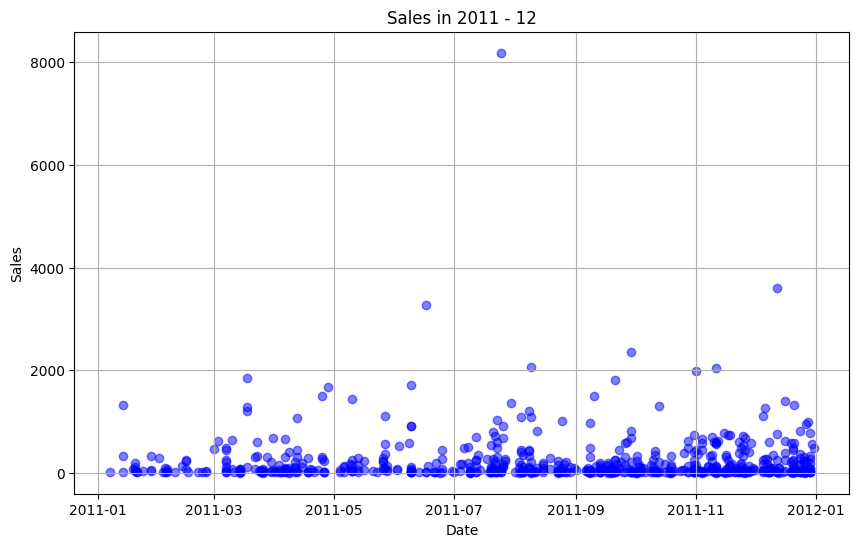

In [23]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format
df1['Date'] = pd.to_datetime(df1['Date'])

# Filter data for the year 2011
df1_2011 = df1[df1['Date'].dt.year == 2011]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df1_2011['Date'], df1_2011['Sales'], color='blue', alpha=0.5)
plt.title('Sales in 2011 - 12')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.savefig('Sales in 2011-12.png', dpi=300, bbox_inches='tight')  # Save with high quality by setting dpi=300
plt.show()


<ipython-input-24-90e2a9aeca92>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime(df1['Date'])


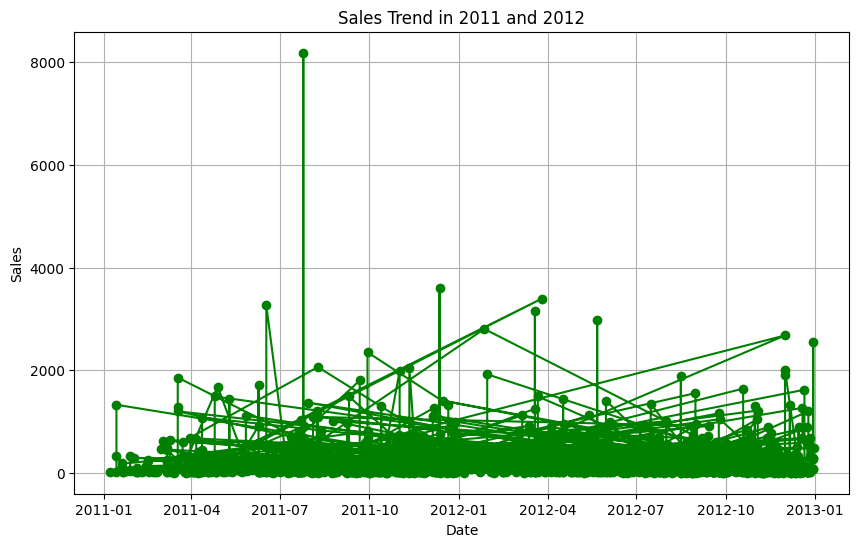

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Date' column to datetime format
df1['Date'] = pd.to_datetime(df1['Date'])

# Filter data for the years 2011 and 2012
df1_2011_2012 = df1[(df1['Date'].dt.year == 2011) | (df1['Date'].dt.year == 2012)]

# Create line plot
plt.figure(figsize=(10, 6))
plt.plot(df1_2011_2012['Date'], df1_2011_2012['Sales'], color='green', marker='o', linestyle='-')
plt.title('Sales Trend in 2011 and 2012')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


<ipython-input-25-f204709dbcca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime(df1['Date'])


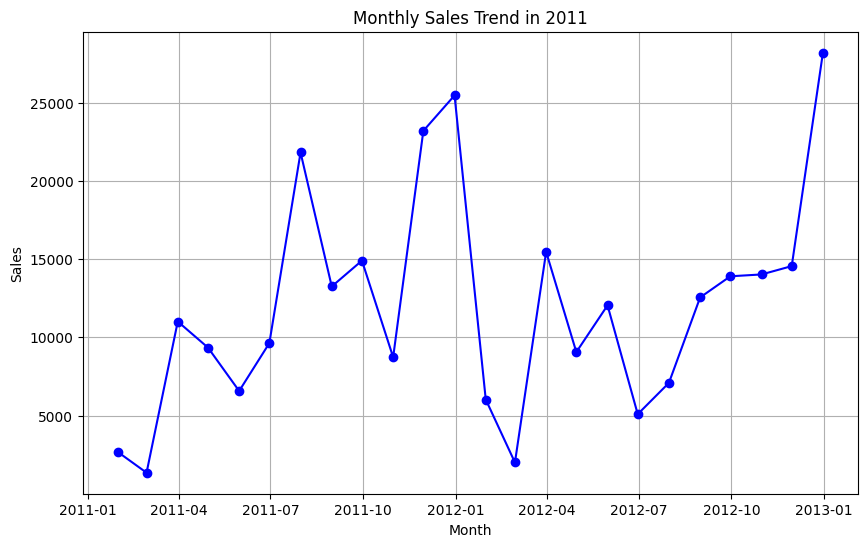

In [25]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format
df1['Date'] = pd.to_datetime(df1['Date'])

# Filter data for the year 2011
df1_2011 = df1[(df1['Date'].dt.year == 2011) | (df1['Date'].dt.year == 2012)]

# Group by month and aggregate sales
monthly_sales_2011 = df1_2011.resample('M', on='Date').sum()

# Create line plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_2011.index, monthly_sales_2011['Sales'], color='blue', marker='o', linestyle='-')
plt.title('Monthly Sales Trend in 2011')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.savefig('Trend Sales in 2011-12.png', dpi=300, bbox_inches='tight')  # Save with high quality by setting dpi=300
plt.show()


In [26]:
monthly_sales_2011.head()

,Sales
Date,
2011-01-31,2648.05
2011-02-28,1348.64
2011-03-31,11008.91
2011-04-30,9343.49
2011-05-31,6570.44


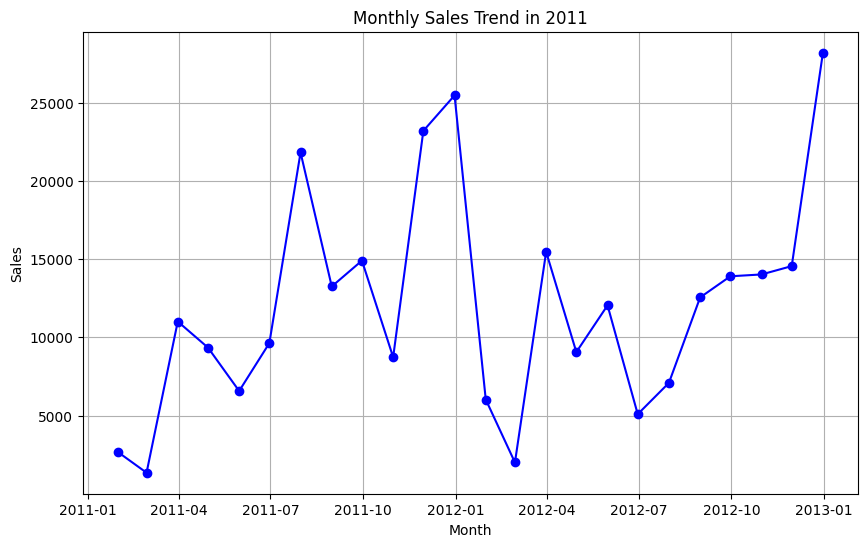

In [27]:
import matplotlib.pyplot as plt

# Plot the monthly sales data for 2011
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_2011.index, monthly_sales_2011['Sales'], color='blue', marker='o', linestyle='-')
plt.title('Monthly Sales Trend in 2011')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


In [28]:
from statsmodels.tsa.stattools import adfuller

In [29]:
test_result=adfuller(monthly_sales_2011['Sales'])

In [30]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [31]:
adfuller_test(monthly_sales_2011['Sales'])

ADF Test Statistic : -2.1963797152477227
p-value : 0.20756203436667198
#Lags Used : 9
Number of Observations Used : 14
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [32]:
monthly_sales_2011['Sales First Difference'] = monthly_sales_2011['Sales'] - monthly_sales_2011['Sales'].shift(1)

In [33]:
monthly_sales_2011['Sales'].shift(1)

Date
2011-01-31         NaN
2011-02-28     2648.05
2011-03-31     1348.64
2011-04-30    11008.91
2011-05-31     9343.49
2011-06-30     6570.44
2011-07-31     9629.41
2011-08-31    21808.55
2011-09-30    13248.24
2011-10-31    14900.55
2011-11-30     8728.75
2011-12-31    23191.63
2012-01-31    25456.41
2012-02-29     6026.74
2012-03-31     2004.90
2012-04-30    15461.42
2012-05-31     9056.03
2012-06-30    12042.67
2012-07-31     5088.96
2012-08-31     7089.84
2012-09-30    12548.35
2012-10-31    13898.91
2012-11-30    14016.66
2012-12-31    14548.89
Freq: M, Name: Sales, dtype: float64

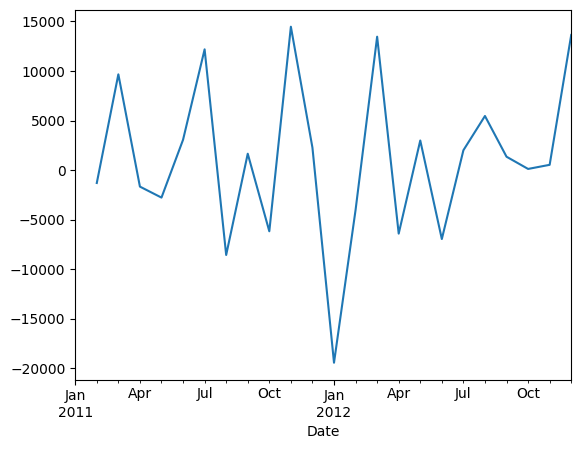

In [34]:
monthly_sales_2011['Sales First Difference'].plot()
plt.savefig('Sales First Difference.png', dpi=300, bbox_inches='tight')  # Save with high quality by setting dpi=300

In [35]:
monthly_sales_2011['Seasonal First Difference']=monthly_sales_2011['Sales']-monthly_sales_2011['Sales'].shift(2)

In [36]:
monthly_sales_2011.head(30)

,Sales,Sales First Difference,Seasonal First Difference
Date,,,
2011-01-31,2648.05,NaN,NaN
2011-02-28,1348.64,-1299.41,NaN
2011-03-31,11008.91,9660.27,8360.86
2011-04-30,9343.49,-1665.42,7994.85
2011-05-31,6570.44,-2773.05,-4438.47
2011-06-30,9629.41,3058.97,285.92
2011-07-31,21808.55,12179.14,15238.11
2011-08-31,13248.24,-8560.31,3618.83
2011-09-30,14900.55,1652.31,-6908.00


In [37]:
## Again test dickey fuller test
adfuller_test(monthly_sales_2011['Seasonal First Difference'].dropna())

ADF Test Statistic : -1.9247304912174532
p-value : 0.3205180219154144
#Lags Used : 9
Number of Observations Used : 12
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


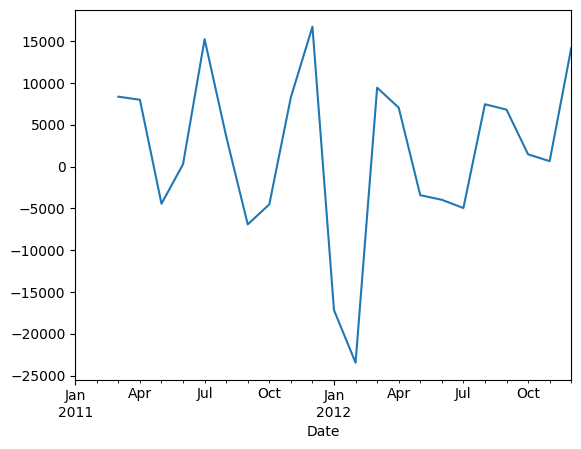

In [38]:
monthly_sales_2011['Seasonal First Difference'].plot()
plt.savefig('Seasonal First Difference.png', dpi=300, bbox_inches='tight')  # Save with high quality by setting dpi=300

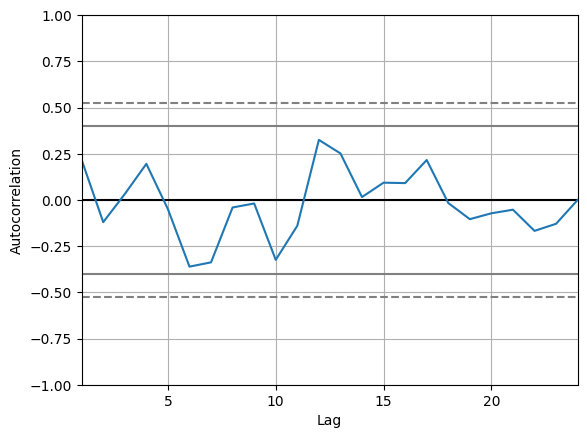

In [39]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(monthly_sales_2011['Sales'])
plt.savefig('autocorrelation plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [40]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


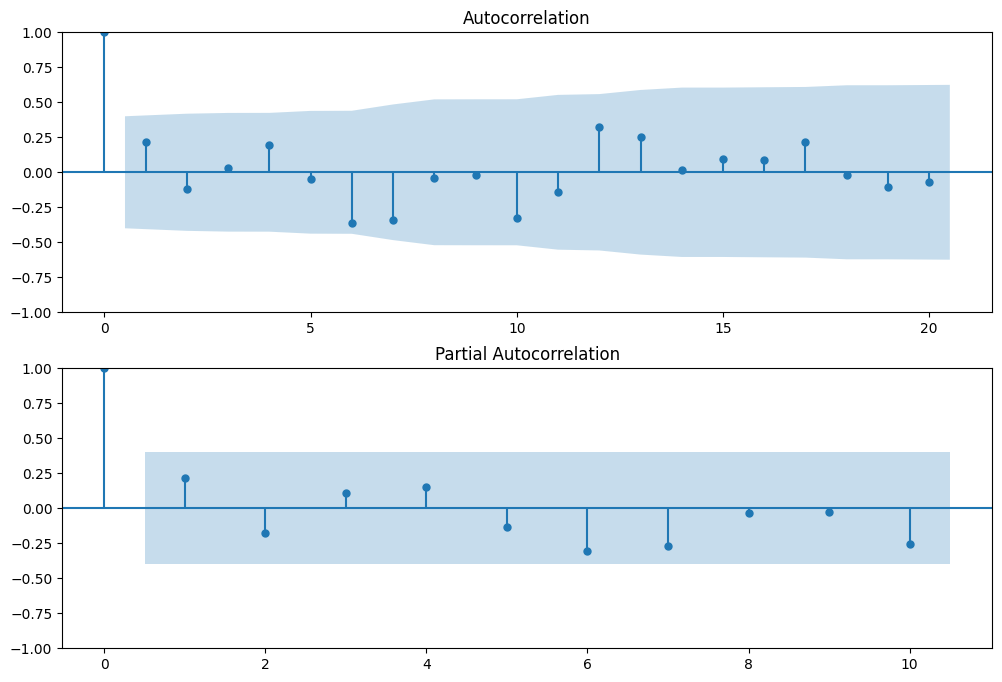

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming monthly_sales_2011 is the DataFrame containing the data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(monthly_sales_2011['Sales'].dropna(), lags=20, ax=ax1)
sm.graphics.tsa.plot_pacf(monthly_sales_2011['Sales'].dropna(), lags=10, ax=ax2)  # Reduced number of lags to 5
plt.savefig('autocorrelation_partialauto correlation plot.png', dpi=300, bbox_inches='tight')
plt.show()


In [42]:
from statsmodels.tsa.arima_model import ARIMA

In [43]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
model = ARIMA(monthly_sales_2011['Sales'], order=(0, 0, 1))

# Fit the model
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   24
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -245.344
Date:                Mon, 20 May 2024   AIC                            496.688
Time:                        11:57:52   BIC                            500.223
Sample:                    01-31-2011   HQIC                           497.626
                         - 12-31-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.199e+04   1898.775      6.317      0.000    8272.191    1.57e+04
ma.L1          0.3848      0.225      1.712      0.087      -0.056       0.825
sigma2      4.545e+07      0.120   3.77e+08      0.0

In [44]:
import plotly.graph_objs as go

# Assuming you have already defined monthly_sales_2011 and model_fit

# Generate the forecast values
monthly_sales_2011['forecast'] = model_fit.predict(start=10, end=20, dynamic=True)

# Create traces for Sales and forecast
trace_sales = go.Scatter(x=monthly_sales_2011.index, y=monthly_sales_2011['Sales'], mode='lines', name='Sales')
trace_forecast = go.Scatter(x=monthly_sales_2011.index, y=monthly_sales_2011['forecast'], mode='lines', name='Forecast')

# Create figure layout
layout = go.Layout(title='Sales vs Forecast', xaxis=dict(title='Date'), yaxis=dict(title='Value'), hovermode='closest')

# Create the figure
fig = go.Figure(data=[trace_sales, trace_forecast], layout=layout)
plt.savefig('Sales Vs Forecast plot_Arima.png', dpi=300, bbox_inches='tight')
# Show the figure
fig.show()


<Figure size 640x480 with 0 Axes>

In [45]:
monthly_sales_2011.shape

(24, 4)

# Seasonal

In [46]:
import statsmodels.api as sm

In [47]:
model=sm.tsa.statespace.SARIMAX(monthly_sales_2011['Sales'],order=(1,1,1),seasonal_order=(1,1,1,17))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [48]:
import pandas as pd
import plotly.express as px

# Assuming you have already defined monthly_sales_2011 and results

# Create a DataFrame with Sales and forecast columns
monthly_sales_2011['forecast'] = results.predict(start=10, end=24, dynamic=True)
df = monthly_sales_2011[['Sales', 'forecast']].reset_index()

# Plot interactive line chart with hover feature
fig = px.line(df, x="Date", y=["Sales", "forecast"], title="Sales vs Forecast", hover_data={"Date": "|%B %d, %Y"})
fig.show()


In [49]:
from pandas.tseries.offsets import DateOffset
future_dates=[monthly_sales_2011.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [50]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=monthly_sales_2011.columns)

In [51]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
2014-07-31,NaN,NaN,NaN,NaN
2014-08-31,NaN,NaN,NaN,NaN
2014-09-30,NaN,NaN,NaN,NaN
2014-10-31,NaN,NaN,NaN,NaN
2014-11-30,NaN,NaN,NaN,NaN


In [52]:
future_df=pd.concat([monthly_sales_2011,future_datest_df])

In [53]:
import plotly.graph_objs as go

# Assuming you have already defined future_df and results

# Generate the forecast values
future_df['forecast'] = results.predict(start=21, end=40, dynamic=True)

# Create traces for Sales and forecast
trace_sales = go.Scatter(x=future_df.index, y=future_df['Sales'], mode='lines', name='Sales')
trace_forecast = go.Scatter(x=future_df.index, y=future_df['forecast'], mode='lines', name='Forecast')

# Create figure layout
layout = go.Layout(title='Sales vs Forecast', xaxis=dict(title='Date'), yaxis=dict(title='Value'), hovermode='closest')

# Create the figure
fig = go.Figure(data=[trace_sales, trace_forecast], layout=layout)

# Show the figure
fig.show()


In [54]:
# Convert 'Date' column to datetime if it's not already in datetime format
# df1['Date'] = pd.to_datetime(df1['Date'])

# Filter the DataFrame to include only December 2012
dec_2012_sales = df1[(df1['Date'].dt.year == 2012) & (df1['Date'].dt.month == 12)]

# Calculate the total sales for December 2012
total_sales_dec_2012 = dec_2012_sales['Sales'].sum()

print("Total sales in December 2012:", total_sales_dec_2012)


Total sales in December 2012: 28182.869999999995


In [55]:
# Filter the DataFrame to include only December 2012
may_2013_sales = df1[(df1['Date'].dt.year == 2013) & (df1['Date'].dt.month == 5)]

# Calculate the total sales for December 2012
total_may_2013_sales = may_2013_sales['Sales'].sum()

print("Total sales in May 2013:", total_may_2013_sales)


Total sales in May 2013: 10806.150000000001


# Regression Analysis

In [56]:
import pandas as pd
import numpy as np

In [57]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sales_INV.csv")

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      3203 non-null   object 
 1   Order Date    3203 non-null   object 
 2   Ship Date     3203 non-null   object 
 3   EmailID       3203 non-null   object 
 4   Geography     3203 non-null   object 
 5   Category      3203 non-null   object 
 6   Product Name  3203 non-null   object 
 7   Sales         3203 non-null   float64
 8   Quantity      3203 non-null   float64
 9   Profit        3203 non-null   float64
dtypes: float64(3), object(7)
memory usage: 250.4+ KB


In [59]:
df.describe()

,Sales,Quantity,Profit
count,3203.000000,3203.000000,3203.000000
mean,226.493266,3.828910,33.849138
std,524.876911,2.260947,174.109155
min,0.990000,1.000000,-3399.980000
25%,19.440000,2.000000,3.850000
50%,60.840000,3.000000,11.170000
75%,215.810000,5.000000,33.000000
max,13999.960000,14.000000,6719.980000


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Convert 'Order Date' column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Select features and target variable
X = df[['Quantity', 'Profit']]  # Features
y = df['Sales']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 288398.70414165093


<ipython-input-60-e980fedd7c8c>:6: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



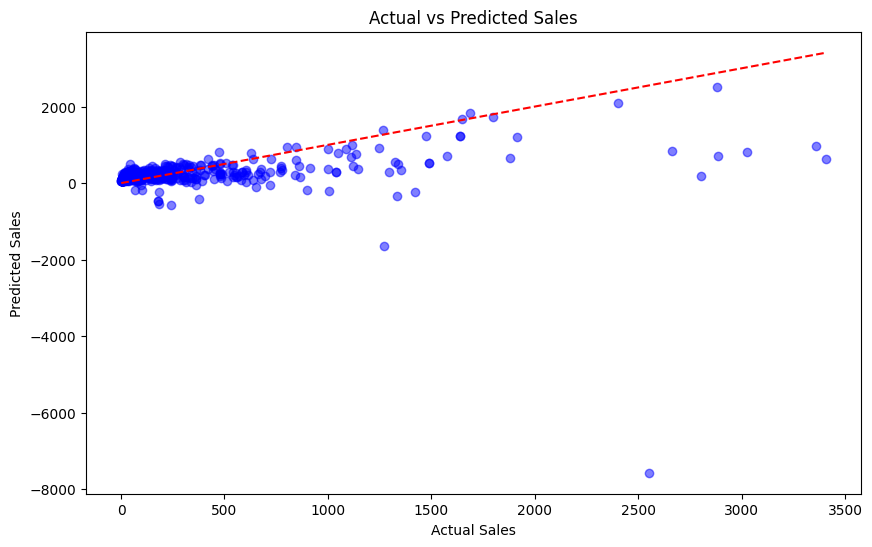

In [61]:
import matplotlib.pyplot as plt

# Plot actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.savefig('Actual vs Predicted sales.png', dpi=300, bbox_inches='tight')
plt.show()


In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are NumPy arrays or pandas Series containing the actual and predicted sales values
# Convert them to pandas Series if they are not already
y_test_series = pd.Series(y_test, name='Actual Sales')
y_pred_series = pd.Series(y_pred, name='Predicted Sales')

# Concatenate the actual and predicted sales Series into a DataFrame
sales_data = pd.concat([y_test_series, y_pred_series], axis=1)

# Display the first few rows of the DataFrame
pd.DataFrame(sales_data)


,Actual Sales,Predicted Sales
3008,419.94,NaN
102,47.98,448.355580
862,95.65,NaN
867,35.34,NaN
999,31.84,NaN
...,...,...
636,NaN,100.070990
637,NaN,-193.549470
638,NaN,249.100577
639,NaN,34.088714


In [63]:
# from sklearn.preprocessing import LabelEncoder

# # Assuming df1 is your dataframe

# # Creating LabelEncoder object
# label_encoder = LabelEncoder()

# # Encoding the 'Category' column
# df['Category_encoded'] = label_encoder.fit_transform(df['Category'])

# # Creating a dictionary to map original labels to encoded values for 'Category'
# category_label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# # Sorting the dictionary by keys
# sorted_category_label_mapping = dict(sorted(category_label_mapping.items(), key=lambda item: item[1]))

# # Printing the mapping for 'Category'
# print("Encoded Category Variables:")
# for label, encoded_value in sorted_category_label_mapping.items():
#     print(f"{label}: {encoded_value}")


In [64]:
# Assuming df is your DataFrame containing the dataset

def display_products_by_Category(df, category_column):
    unique_Category = df[category_column].unique()

    for Category in unique_Category:
       Category_products = df[df[category_column] == Category]
       print(f"{Category}:")
       print(Category_products)
       print()

display_products_by_Category(df,'Category')

Labels:
            Order ID Order Date Ship Date                     EmailID  \
0     CA-2013-138688 2013-06-13  17-06-13     DarrinVanHuff@gmail.com   
92    CA-2013-142902 2013-09-13  15-09-13       BenPeterman@gmail.com   
118   CA-2014-117457 2014-09-12  13-12-14      KeithHerrera@gmail.com   
146   CA-2014-140963 2014-11-06  14-06-14      MichelleTran@gmail.com   
173   CA-2013-113243 2013-11-06  16-06-13        OlveraToch@gmail.com   
...              ...        ...       ...                         ...   
3104  CA-2014-122770 2014-12-14  19-12-14         EmilyPhan@gmail.com   
3130  CA-2014-131303 2014-11-29  03-12-14         EmilyPhan@gmail.com   
3149  US-2013-125402 2013-09-26  02-10-13         DanLawera@gmail.com   
3150  US-2013-125402 2013-09-26  02-10-13         DanLawera@gmail.com   
3175  CA-2012-132388 2012-10-10  12-10-12  KatherineNockton@gmail.com   

                                   Geography Category  \
0       United States,Los Angeles,California   Labels   
9

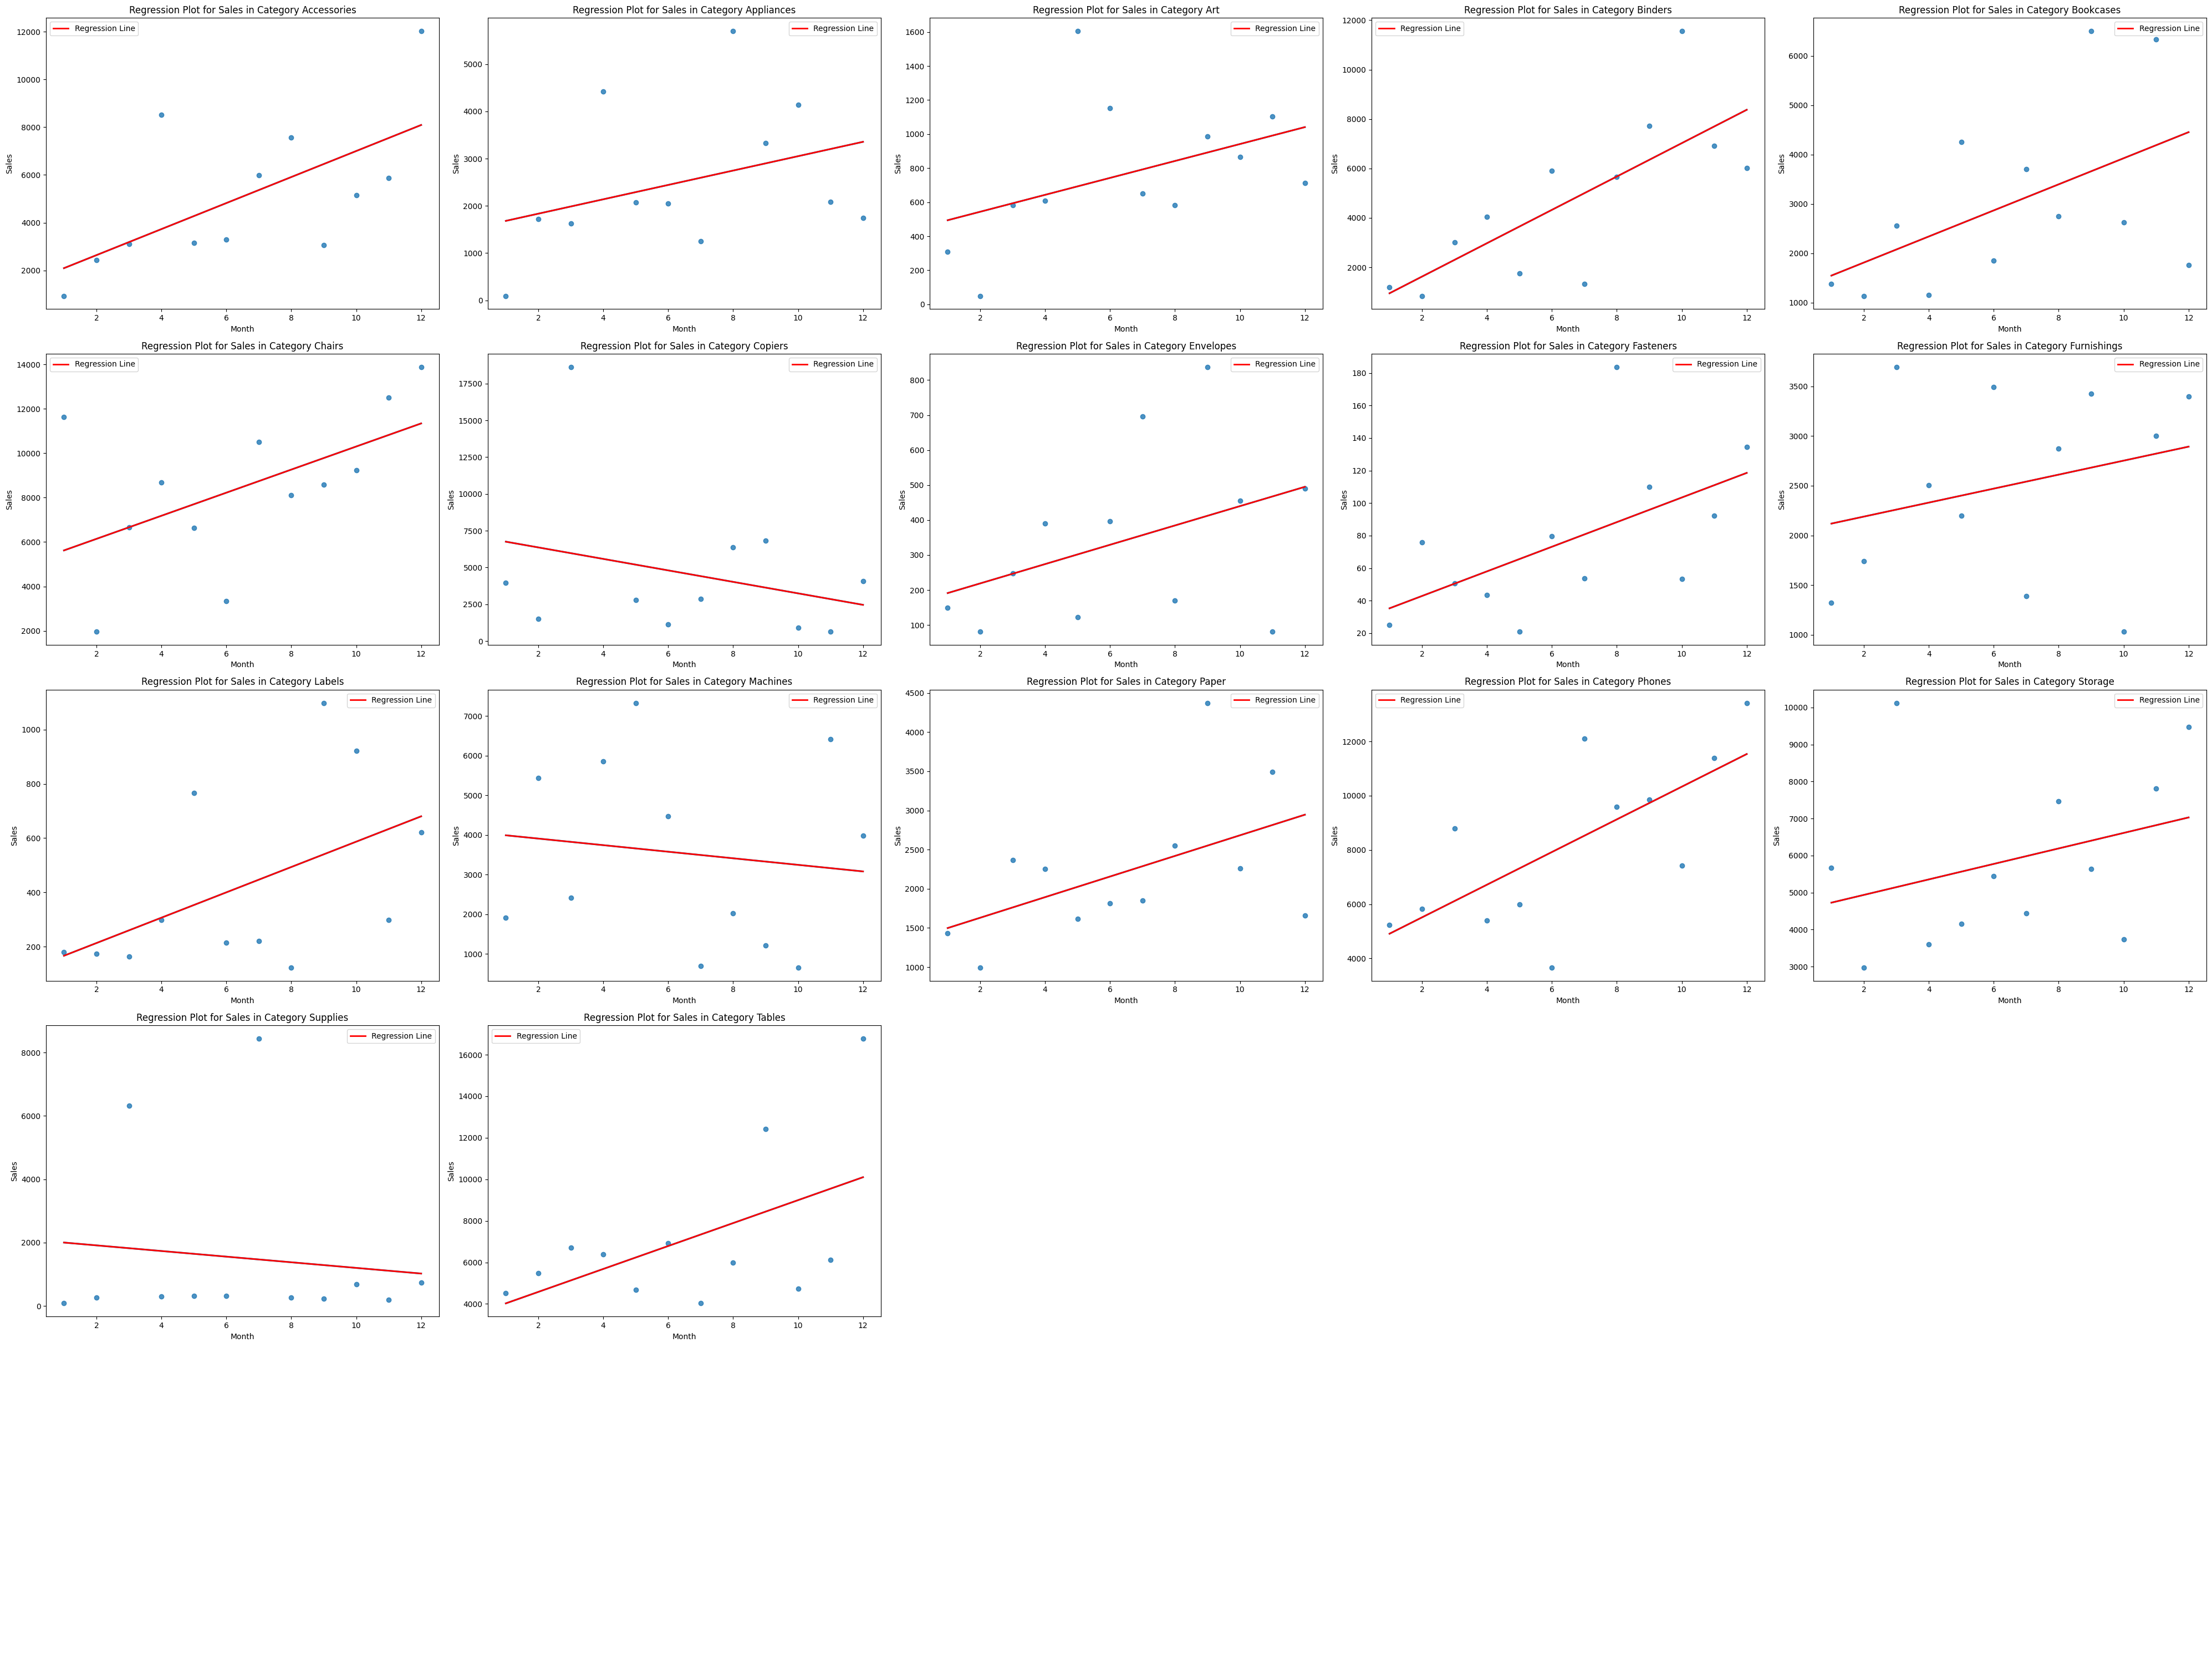

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import math

# Convert 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract month from 'Order Date' column
df['Month'] = df['Order Date'].dt.month

# Group data by category and month, and sum the sales
monthly_sales = df.groupby(['Category', 'Month']).agg({'Sales': 'sum'}).reset_index()

# Define a function to perform regression and plot for each category
def display_regression_by_category(df, category_column, target_column):
    unique_categories = df[category_column].unique()
    num_categories = len(unique_categories)

    # Calculate number of rows and columns for subplots
    ncols = nrows = math.ceil(math.sqrt(num_categories))

    # Create a figure with subplots
    fig, axes = plt.subplots(nrows, ncols, figsize=(8*ncols, 6*nrows))

    # Flatten axes if it's a single row or column
    axes = axes.flatten()

    for i, category in enumerate(unique_categories):
        category_data = df[df[category_column] == category]

        X = category_data['Month'].values.reshape(-1, 1)
        y = category_data[target_column].values

        # Perform linear regression
        model = LinearRegression()
        model.fit(X, y)

        # Predict sales
        y_pred = model.predict(X)

        # Calculate accuracy
        accuracy = r2_score(y, y_pred)

        # Plot regression line
        ax = axes[i]
        sns.regplot(x='Month', y=target_column, data=category_data, ci=None, ax=ax)
        ax.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
        ax.set_xlabel('Month')
        ax.set_ylabel(target_column)
        ax.set_title(f'Regression Plot for {target_column} in Category {category}')
        ax.legend()

    # Hide empty subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Call the function with the appropriate columns
display_regression_by_category(monthly_sales, 'Category', 'Sales')


# LSTM

In [66]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [67]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [68]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sales_INV.csv")

In [69]:
df

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,13-06-13,17-06-13,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,09-06-11,14-06-11,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,09-06-11,14-06-11,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,09-06-11,14-06-11,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,09-06-11,14-06-11,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78
...,...,...,...,...,...,...,...,...,...,...
3198,CA-2013-125794,30-09-13,04-10-13,MarisLaWare@gmail.com,"United States,Los Angeles,California",Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.24,1.0,15.22
3199,CA-2014-121258,27-02-14,04-03-14,DaveBrooks@gmail.com,"United States,Costa Mesa,California",Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2.0,15.63
3200,CA-2014-121258,27-02-14,04-03-14,DaveBrooks@gmail.com,"United States,Costa Mesa,California",Phones,Aastra 57i VoIP phone,258.58,2.0,19.39
3201,CA-2014-121258,27-02-14,04-03-14,DaveBrooks@gmail.com,"United States,Costa Mesa,California",Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4.0,13.32


In [70]:
# Convert 'Order Date' column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Resample the data to get monthly total sales with the last day of each month
monthly_sales = df.resample('M', on='Order Date').sum()

# Select only the 'Order Date' and 'Sales' columns
df1 = monthly_sales[['Sales']]

# Display the resulting DataFrame
print(df1)

               Sales
Order Date          
2011-01-31   6272.91
2011-02-28   2034.87
2011-03-31   9611.27
2011-04-30   9279.30
2011-05-31   6646.20
2011-06-30   8272.06
2011-07-31  21058.14
2011-08-31  10987.62
2011-09-30  20667.71
2011-10-31  11996.40
2011-11-30  16144.08
2011-12-31  24912.51
2012-01-31  15642.71
2012-02-29   6634.08
2012-03-31  16783.35
2012-04-30   8270.37
2012-05-31  12939.23
2012-06-30   7959.27
2012-07-31   7717.10
2012-08-31  11409.87
2012-09-30  10696.94
2012-10-31  13050.03
2012-11-30  12089.36
2012-12-31  16773.93
2013-01-31   6176.04
2013-02-28   5517.33
2013-03-31  14190.44
2013-04-30  14073.33
2013-05-31  16665.03
2013-06-30  15586.66
2013-07-31  14701.79
2013-08-31  16563.33
2013-09-30  17957.34
2013-10-31  11799.99
2013-11-30  25952.08
2013-12-31  27792.73
2014-01-31  11935.46
2014-02-28  18510.72
2014-03-31  36484.24
2014-04-30  22848.25
2014-05-31  13228.69
2014-06-30  13696.78
2014-07-31  16780.04
2014-08-31  29000.96
2014-09-30  26942.07
2014-10-31  1

<ipython-input-70-4fed4a4a101c>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [71]:
# Select sales column from DataFrame df
timeseries_data = df1['Sales'].values

# choose a number of time steps
n_steps = 3

# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [72]:
print(X),print(y)

[[ 6272.91  2034.87  9611.27]
 [ 2034.87  9611.27  9279.3 ]
 [ 9611.27  9279.3   6646.2 ]
 [ 9279.3   6646.2   8272.06]
 [ 6646.2   8272.06 21058.14]
 [ 8272.06 21058.14 10987.62]
 [21058.14 10987.62 20667.71]
 [10987.62 20667.71 11996.4 ]
 [20667.71 11996.4  16144.08]
 [11996.4  16144.08 24912.51]
 [16144.08 24912.51 15642.71]
 [24912.51 15642.71  6634.08]
 [15642.71  6634.08 16783.35]
 [ 6634.08 16783.35  8270.37]
 [16783.35  8270.37 12939.23]
 [ 8270.37 12939.23  7959.27]
 [12939.23  7959.27  7717.1 ]
 [ 7959.27  7717.1  11409.87]
 [ 7717.1  11409.87 10696.94]
 [11409.87 10696.94 13050.03]
 [10696.94 13050.03 12089.36]
 [13050.03 12089.36 16773.93]
 [12089.36 16773.93  6176.04]
 [16773.93  6176.04  5517.33]
 [ 6176.04  5517.33 14190.44]
 [ 5517.33 14190.44 14073.33]
 [14190.44 14073.33 16665.03]
 [14073.33 16665.03 15586.66]
 [16665.03 15586.66 14701.79]
 [15586.66 14701.79 16563.33]
 [14701.79 16563.33 17957.34]
 [16563.33 17957.34 11799.99]
 [17957.34 11799.99 25952.08]
 [11799.99

(None, None)

In [73]:
X.shape

(45, 3)

In [74]:

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [ ]:
# define model
model = Sequential()
model.add(LSTM(500, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(500 , activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=800, verbose=1)


Epoch 1/800
2/2 [==============================] - 3s 77ms/step - loss: 290581344.0000
Epoch 2/800
2/2 [==============================] - 0s 76ms/step - loss: 250822672.0000
Epoch 3/800
2/2 [==============================] - 0s 124ms/step - loss: 200668864.0000
Epoch 4/800
2/2 [==============================] - 0s 136ms/step - loss: 142206000.0000
Epoch 5/800
2/2 [==============================] - 0s 123ms/step - loss: 80248232.0000
Epoch 6/800
2/2 [==============================] - 0s 112ms/step - loss: 50858984.0000
Epoch 7/800
2/2 [==============================] - 0s 91ms/step - loss: 61236464.0000
Epoch 8/800
2/2 [==============================] - 0s 96ms/step - loss: 69135168.0000
Epoch 9/800
2/2 [==============================] - 0s 95ms/step - loss: 53626500.0000
Epoch 10/800
2/2 [==============================] - 0s 98ms/step - loss: 45332788.0000
Epoch 11/800
2/2 [==============================] - 0s 104ms/step - loss: 49501536.0000
Epoch 12/800
2/2 [=========================

In [ ]:
# Get the last 3 rows of sales data from df1
x_input = df1['Sales'].tail(3).values

# demonstrate prediction for next 10 days
temp_input = list(x_input)
lst_output = []
i = 0

while i < 12:
    if len(temp_input) > 3:
        x_input = np.array(temp_input[1:])
        print("{} month input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print("{} month output {}".format(i, yhat))
        temp_input.append(yhat[0][0])
        temp_input = temp_input[1:]
        lst_output.append(yhat[0][0])
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

print(lst_output)


In [ ]:

timeseries_data

In [ ]:
len(timeseries_data)

In [ ]:
lst_output

In [ ]:
import matplotlib.pyplot as plt

In [ ]:

day_new=np.arange(1,10)
day_pred=np.arange(10,20)

In [ ]:
import pandas as pd
import plotly.express as  px

# Create DataFrame for actual sales and forecast
df_actual = pd.DataFrame({'Month': np.arange(1, len(timeseries_data) + 1), 'Sales': timeseries_data})
df_forecast = pd.DataFrame({'Month': np.arange(len(timeseries_data), len(timeseries_data) + 12), 'Forecast': lst_output})

# Concatenate actual and forecast data
df_combined = pd.concat([df_actual, df_forecast], ignore_index=True)

# Plot using Plotly Express
fig = px.line(df_combined, x='Month', y=['Sales', 'Forecast'], title='Actual Sales vs Forecast')
fig.show()


In [ ]:
print("Length of actual sales data:", len(df_actual['Sales']))
print("Length of forecasted data:", len(df_forecast['Forecast']))


In [ ]:
from sklearn.metrics import mean_absolute_error
 # Take the first 12 rows of the actual sales data
df_actual_first12 = df_actual.head(12)

# Calculate MAE
mae = mean_absolute_error(df_actual_first12['Sales'], df_forecast['Forecast'])

# Calculate RMSE
rmse = mean_squared_error(df_actual_first12['Sales'], df_forecast['Forecast'], squared=False)

print("MAE:", mae)
print("RMSE:", rmse)



# Support Vector

**SALES & PROFIT**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sales_INV.csv")

In [ ]:
# Assuming df is your DataFrame containing the data
df['Order Date'] = pd.to_datetime(df['Order Date'])

for category in df['Category'].unique():
    category_subset = df[df['Category'] == category]
    monthly_sales_quantity = category_subset.resample('M', on='Order Date').agg({'Sales': 'sum', 'Quantity': 'sum', 'Profit':'sum'})
    print(f"{category}:")
    print(monthly_sales_quantity)
    print()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import math

# Convert 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Define a function to plot monthly sales, quantity, and profit
def plot_monthly_data(df, category, ax):
    category_subset = df[df['Category'] == category]
    monthly_sales_quantity_profit = category_subset.resample('M', on='Order Date').agg({'Sales': 'sum', 'Quantity': 'sum', 'Profit':'sum'})

    # Plotting monthly sales
    ax.plot(monthly_sales_quantity_profit.index, monthly_sales_quantity_profit['Sales'], label='Sales')
    ax.set_xlabel('Date')
    ax.set_ylabel('Sales')
    ax.set_title(f'Monthly Sales for Category: {category}')
    ax.legend()

    # Plotting monthly quantity
    ax.plot(monthly_sales_quantity_profit.index, monthly_sales_quantity_profit['Quantity'], label='Quantity')
    ax.set_xlabel('Date')
    ax.set_ylabel('Quantity')
    ax.set_title(f'Monthly Quantity for Category: {category}')
    ax.legend()

    # Plotting monthly profit
    ax.plot(monthly_sales_quantity_profit.index, monthly_sales_quantity_profit['Profit'], label='Profit')
    ax.set_xlabel('Date')
    ax.set_ylabel('Profit')
    ax.set_title(f'Monthly Profit for Category: {category}')
    ax.legend()

# Iterate over unique categories and plot monthly data for each category
unique_categories = df['Category'].unique()
num_categories = len(unique_categories)
ncols = math.ceil(math.sqrt(num_categories))
nrows = math.ceil(num_categories / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(8*ncols, 5*nrows))  # Expanded horizontally

for i, category in enumerate(unique_categories):
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]
    plot_monthly_data(df, category, ax)

# Hide empty subplots
for i in range(num_categories, nrows*ncols):
    row = i // ncols
    col = i % ncols
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
df.info()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame containing the data
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Step 1: Subset the data and aggregate monthly quantities and profits for each category
monthly_data = df.groupby(['Category', pd.Grouper(key='Order Date', freq='M')]).agg({'Sales': 'sum', 'Quantity': 'sum', 'Profit': 'sum'}).reset_index()

# Step 2: Initialize an empty dictionary to store results
results = {}

# Step 3: Iterate over each category
for category in monthly_data['Category'].unique():
    # Subset data for the current category
    category_data = monthly_data[monthly_data['Category'] == category]

    # Prepare the features (X) and target variable (y)
    X = category_data[['Sales', 'Quantity']]
    y = category_data['Profit']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Calculate RMSE
    train_rmse = mean_squared_error(y_train, train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, test_pred, squared=False)

    # Store results in the dictionary
    results[category] = {'Train RMSE': train_rmse, 'Test RMSE': test_rmse}

# Print the results
for category, scores in results.items():
    print(f"{category}: Train RMSE - {scores['Train RMSE']}, Test RMSE - {scores['Test RMSE']}")
    print()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming df is your DataFrame containing the data
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Step 1: Subset the data and aggregate monthly quantities and profits for each category
monthly_data = df.groupby(['Category', pd.Grouper(key='Order Date', freq='M')]).agg({'Sales': 'sum', 'Quantity': 'sum', 'Profit': 'sum'}).reset_index()

# Step 2: Prepare the features (X) and target variable (y)
X = monthly_data[['Sales', 'Quantity']]
y = monthly_data['Profit']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Support Vector Machine regressor
model = SVR(kernel='linear')
model.fit(X_train, y_train)

# Step 5: Make predictions on training and testing data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Step 6: Compute RMSE for training and testing data
train_rmse = mean_squared_error(y_train, train_pred, squared=False)
test_rmse = mean_squared_error(y_test, test_pred, squared=False)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import math

# Get unique categories
unique_categories = df['Category'].unique()
num_categories = len(unique_categories)

# Calculate number of rows and columns for subplots
ncols = nrows = math.ceil(math.sqrt(num_categories))

# Create subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(8*ncols, 6*nrows))

# Iterate over each category
for i, category in enumerate(unique_categories):
    # Filter data for the current category
    category_data = df[df['Category'] == category]

    # Prepare features (X) and target variable (y) for the current category
    X_category = category_data[['Sales', 'Quantity']]
    y_category = category_data['Profit']

    # Split data into training and testing sets
    X_train_category, X_test_category, y_train_category, y_test_category = train_test_split(X_category, y_category, test_size=0.2, random_state=42)

    # Train a Support Vector Machine regressor for the current category
    model_category = SVR(kernel='linear')
    model_category.fit(X_train_category, y_train_category)

    # Make predictions on training and testing data
    train_pred_category = model_category.predict(X_train_category)
    test_pred_category = model_category.predict(X_test_category)

    # Plot the actual vs predicted values for the current category
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]
    ax.scatter(y_test_category, test_pred_category, color='blue', alpha=0.5)
    ax.plot([y_test_category.min(), y_test_category.max()], [y_test_category.min(), y_test_category.max()], color='red', linestyle='--')
    ax.set_xlabel('Actual Profit')
    ax.set_ylabel('Predicted Profit')
    ax.set_title(f'Actual vs Predicted Profit for {category}')

# Hide empty subplots
for i in range(num_categories, nrows*ncols):
    row = i // ncols
    col = i % ncols
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()
